<a href="https://colab.research.google.com/github/sujalsha/Electrol-Bond-Analysis/blob/main/ElectrolBondAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [5]:
data = pd.read_csv('/content/ELECTROL BOND DONORS.csv')
data_donations = pd.read_csv('/content/PARTY-WISE ELECTROL BOND DONATION.csv')

In [6]:
# Display the first few rows of the DataFrame to understand its structure
print(data_donations.head())

  Date of\nEncashment               Name of the Political Party  Denomination  \
0         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
1         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
2         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      10000000   
3         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
4         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [7]:
# Display the first few rows of the DataFrame to understand its structure
print(data.head())

  Date of Purchase       Purchaser Name  Denomination  Unnamed: 3
0      12/Apr/2019  A B C INDIA LIMITED        100000         NaN
1      12/Apr/2019  A B C INDIA LIMITED        100000         NaN
2      12/Apr/2019  A B C INDIA LIMITED       1000000         NaN
3      12/Apr/2019  A B C INDIA LIMITED       1000000         NaN
4      12/Apr/2019  A B C INDIA LIMITED        100000         NaN


In [8]:
# Count the number of purchases by purchaser name
purchases_by_purchaser = data['Purchaser Name'].value_counts()
print("\nPurchases by Purchaser:")
print(purchases_by_purchaser)



Purchases by Purchaser:
FUTURE GAMING AND HOTEL SERVICES PR               1208
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     821
QWIKSUPPLYCHAINPRIVATELIMITED                      410
HALDIA ENERGY LIMITED                              395
VEDANTA LIMITED                                    386
                                                  ... 
MR. SAMEER BHATIA                                    1
B.DAS AND ASSOCIATES PVT. LTD.                       1
J B ENTERPRISE                                       1
RAYALA SEEMA WIND ENERGY PVT LTD                     1
GORUKANTI SURENDER RAO                               1
Name: Purchaser Name, Length: 1316, dtype: int64


In [9]:
# Count the number of donations by political party
donations_by_party = data_donations['Name of the Political Party'].value_counts()
print("\PARTY-WISE ELECTROL BOND DONATION (INR-CR):")
print(donations_by_party)

\PARTY-WISE ELECTROL BOND DONATION (INR-CR):
BHARTIYA JANTA PARTY                              8633
ALL INDIA TRINAMOOL CONGRESS                      3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE           3146
BHARAT RASHTRA SAMITHI                            1806
BIJU JANATA DAL                                    861
DMK PARTY IN PARLIAMENT                            648
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R             472
SHIVSENA (POLITICAL PARTY)                         354
TELUGU DESAM PARTY                                 279
AAM AADMI PARTY                                    245
RASTRIYA JANTA DAL                                 149
NATIONALIST CONGRESS PARTY PARLIAMENT OF           116
JANATA DAL ( SECULAR )                              75
SIKKIM KRANTIKARI MORCHA                            50
ADYAKSHA SAMAJVADI PARTY                            46
JHARKHAND MUKTI MORCHA                              45
JANASENA PARTY                                      39
ALL INDIA ANNA DRAVI

In [10]:
# Total amount of donations
total_donations = data_donations['Denomination'].sum()
print("\nTotal Donations (INR):", total_donations)


Total Donations (INR): 127690893000


In [11]:
# Total amount of bonds purchased
total_bonds_purchased = data['Denomination'].sum()
print("\nTotal Bonds Purchased:(INR)", total_bonds_purchased)


Total Bonds Purchased:(INR) 121555132000


In [12]:
# Analyze trends over time (assuming 'Date of Purchase' is in a datetime format)
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['Year'] = data['Date of Purchase'].dt.year
data['Month'] = data['Date of Purchase'].dt.month

In [13]:
# Number of purchases per year
purchases_by_year = data['Year'].value_counts().sort_index()
print("\nPurchases by Year:")
print(purchases_by_year)


Purchases by Year:
2019    3154
2020     460
2021    2647
2022    5314
2023    6399
2024     897
Name: Year, dtype: int64


In [14]:
# Number of purchases per month
purchases_by_month = data.groupby(['Year', 'Month']).size()
print("\nPurchases by Month:")
print(purchases_by_month)


Purchases by Month:
Year  Month
2019  4        1335
      5        1187
      7         101
      10        531
2020  1         139
      10        321
2021  1         151
      4         974
      7         465
      10       1057
2022  1        2068
      4         811
      7         480
      10        741
      11        954
      12        260
2023  1         437
      4        1470
      7        1371
      10       2012
      11       1109
2024  1         897
dtype: int64


In [15]:
# Visualization
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Number of Purchases')

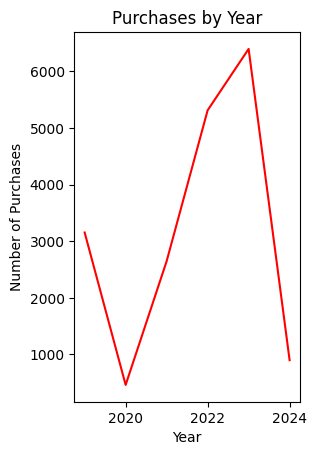

In [16]:
# Plot purchases by year
plt.subplot(1, 2, 1)
purchases_by_year.plot(kind='line', color='red')
plt.title('Purchases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')

In [17]:
# Aggregate the total amount of bonds purchased by each purchaser
purchases_by_purchaser = data.groupby('Purchaser Name')['Denomination'].sum()

In [18]:
# Select the top 5 purchasers by total amount
top_10_purchasers = purchases_by_purchaser.nlargest(10)

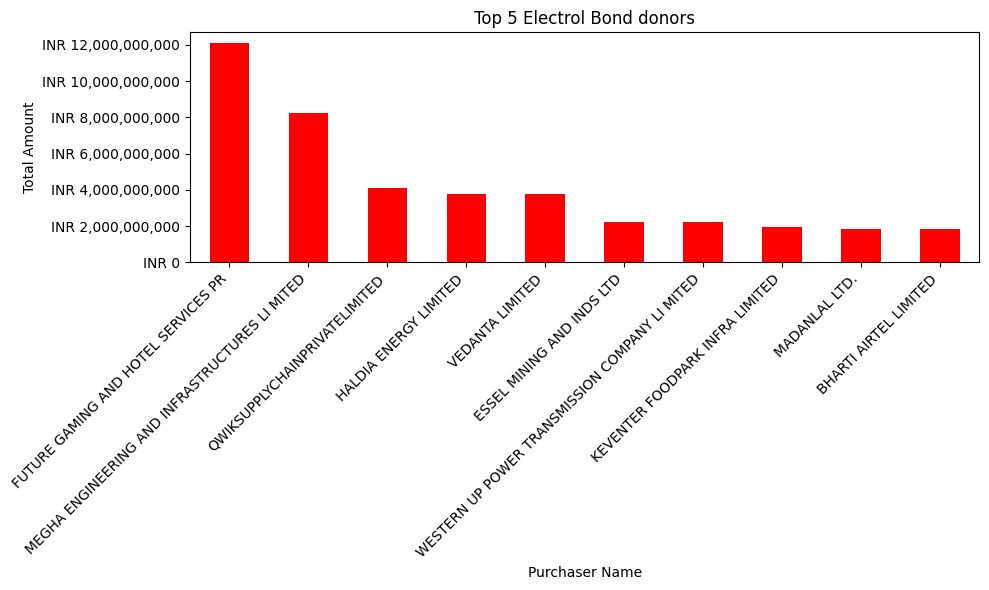

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
ax = top_10_purchasers.plot(kind='bar', color='red')
plt.title('Top 5 Electrol Bond donors')
plt.xlabel('Purchaser Name')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')

# Adding amount scale
formatter = FuncFormatter(lambda x, _: 'INR {:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [20]:
# Analyze trends over time (assuming 'Date of\nEncashment' is in a datetime format)
data_donations['Date of\nEncashment'] = pd.to_datetime(data_donations['Date of\nEncashment'])
data_donations['Year'] = data_donations['Date of\nEncashment'].dt.year
data_donations['Month'] = data_donations['Date of\nEncashment'].dt.month

In [21]:
# Number of donations per year
donations_by_year = data_donations['Year'].value_counts().sort_index()
print("\nDonations by Year:")
print(donations_by_year)


Donations by Year:
2019    4783
2020     459
2021    2642
2022    5300
2023    6365
2024     872
Name: Year, dtype: int64


In [22]:
# Number of donations per month
donations_by_month = data_donations.groupby(['Year', 'Month']).size()
print("\nDonations by Month:")
print(donations_by_month)


Donations by Month:
Year  Month
2019  4        2983
      5        1168
      7         101
      10        531
2020  1         136
      2           3
      10        181
      11        139
2021  1         148
      4         972
      7         465
      10       1057
2022  1        2063
      4         811
      7         475
      10        738
      11        953
      12        260
2023  1         226
      2         203
      4        1455
      7        1365
      10       2007
      11       1071
      12         38
2024  1         872
dtype: int64


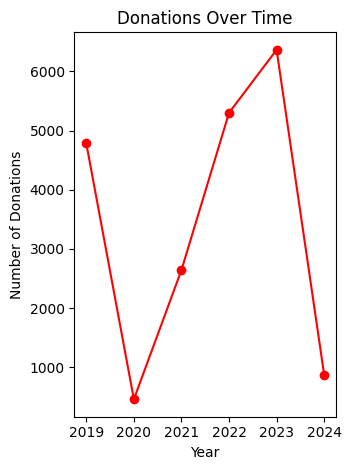

In [23]:
# Plot donations over time
plt.subplot(1, 2, 2)
plt.plot(donations_by_year.index, donations_by_year.values, marker='o', color='red')
plt.title('Donations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Donations')

plt.tight_layout()
plt.show()


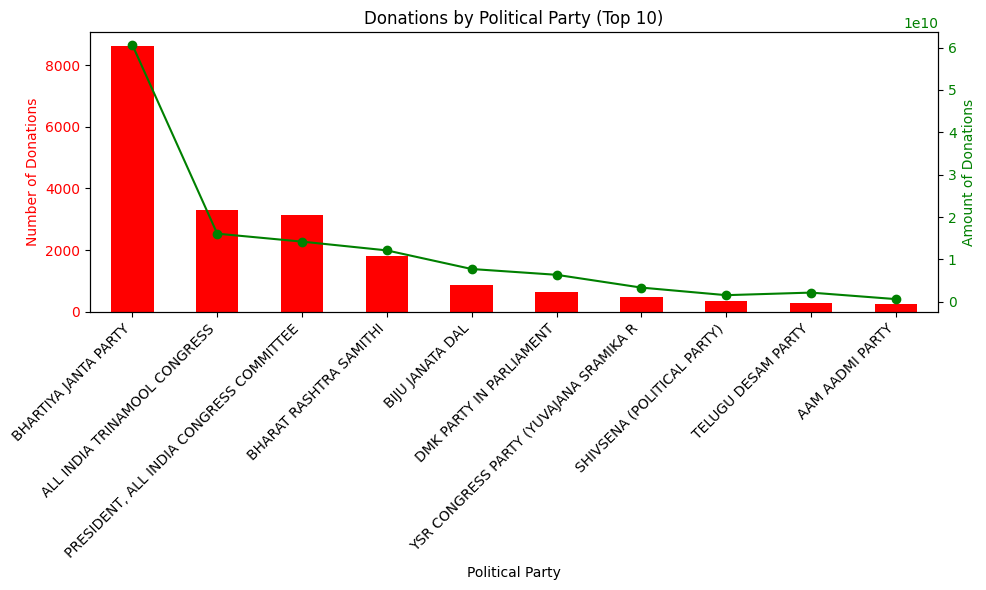

In [24]:
# Aggregate the total amount of donations by each political party
amount_of_donations_by_party = data_donations.groupby('Name of the Political Party')['Denomination'].sum()

# Select the top 10 political parties by the number of donations
top_10_donations_by_party = donations_by_party.nlargest(10)

# Plot donations by political party (only top 10)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'red'
ax1.set_xlabel('Political Party')
ax1.set_ylabel('Number of Donations', color=color)
top_10_donations_by_party.plot(kind='bar', color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adding secondary y-axis for amount of donations
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Amount of Donations', color=color)
amount_of_donations_by_party[top_10_donations_by_party.index].plot(kind='line', color=color, ax=ax2, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Donations by Political Party (Top 10)')
plt.tight_layout()
plt.show()

In [29]:
# Rename columns for clarity
data_donations.rename(columns={'Date of\nEncashment': 'Date', 'Name of the Political Party': 'Political Party'}, inplace=True)
data.rename(columns={'Date of Purchase': 'Date', 'Purchaser Name': 'Company Name'}, inplace=True)

# Convert date columns to datetime
data['Date'] = pd.to_datetime(data['Date'])
data_donations['Date'] = pd.to_datetime(data_donations['Date'])

# Merge datasets
merged_data = pd.merge(data, data_donations, on=['Date'], how='outer')

In [30]:
# Group by date and political party to calculate total bonds bought and received
grouped_data = merged_data.groupby(['Date', 'Political Party']).agg({'Denomination_x': 'sum', 'Denomination_y': 'sum'}).reset_index()
grouped_data.columns = ['Date', 'Political Party', 'Bonds Purchased', 'Bonds Received']

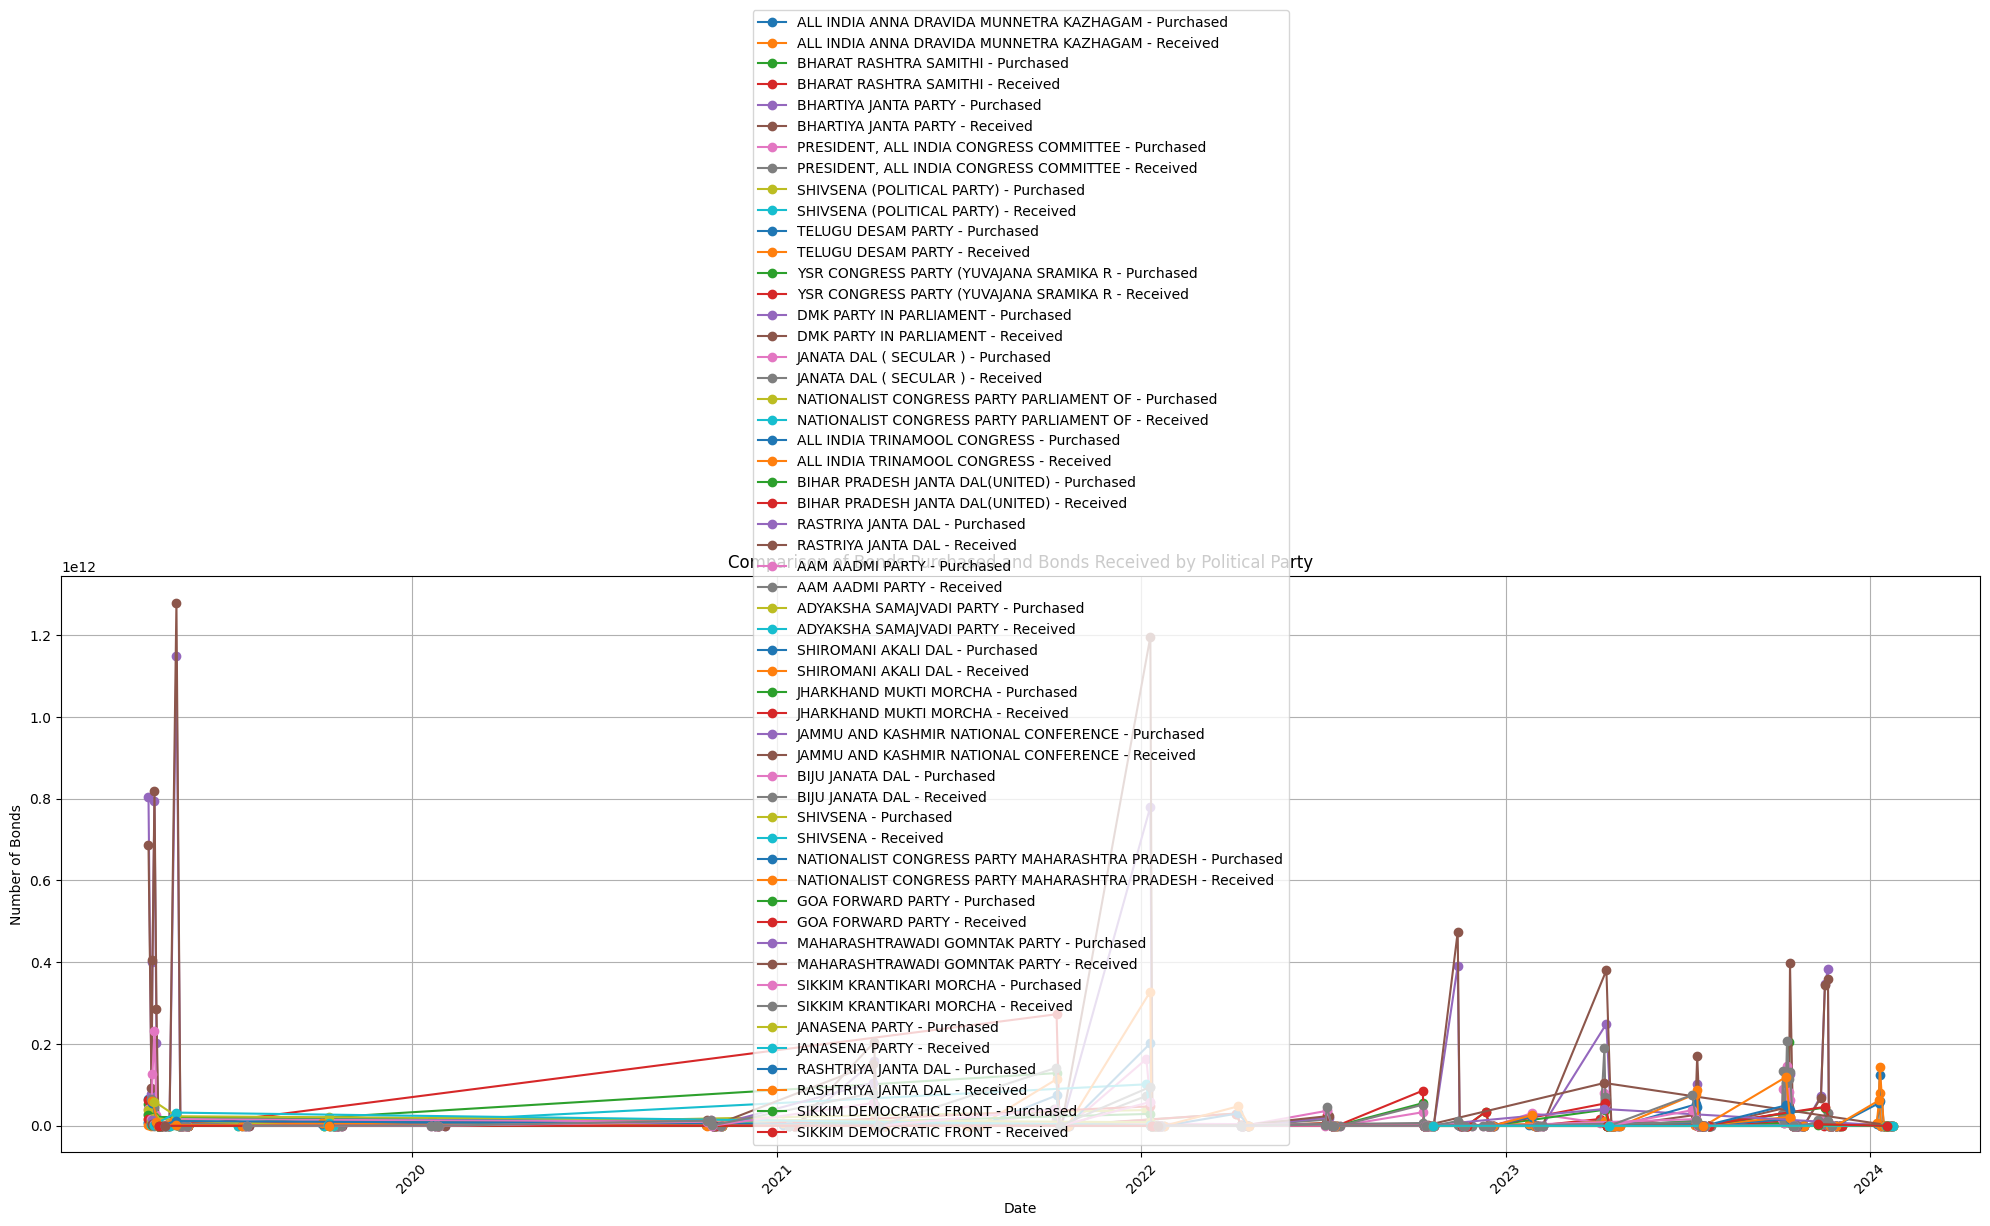

In [39]:
# Plot comparison of bonds purchased and bonds received
plt.figure(figsize=(20, 10))
for party in grouped_data['Political Party'].unique():
    party_data = grouped_data[grouped_data['Political Party'] == party]
    plt.plot(party_data['Date'], party_data['Bonds Purchased'], label=f'{party} - Purchased', marker='o')
    plt.plot(party_data['Date'], party_data['Bonds Received'], label=f'{party} - Received', marker='o')

plt.title('Comparison of Bonds Purchased and Bonds Received by Political Party')
plt.xlabel('Date')
plt.ylabel('Number of Bonds')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
company_party_payments = merged_data.groupby(['Company Name', 'Political Party'])['Denomination_x'].sum().unstack(fill_value=0)



Company Payments to Political Parties:
Political Party                     ALL INDIA TRINAMOOL CONGRESS  \
Company Name                                                       
14 REELS PLUS LLP                                    150000000.0   
A B C INDIA LIMITED                                          0.0   
AAKANKSHA BAHETY                                      69000000.0   
AARISH SOLAR POWER PRIVATE LIMITED                           0.0   
AASHMAN ENERGY PRIVATE LIMITED                               0.0   
...                                                          ...   
YOGESH MANPURIA                                              0.0   
YUVAN TRADING CONSULTANCY LLP                                0.0   
ZUVAN ENERGY PRIVATE LIMITED                                 0.0   
ZUVAN ENERGY PVT LTD                                 300000000.0   
ZYDUS HEALTHCARE LIMITED                                     0.0   

Political Party                     ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGA

<ipython-input-40-f599d7e5143c>:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()# Group by company name and political party to calculate total amount paid by each company to each party
<ipython-input-40-f599d7e5143c>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()# Group by company name and political party to calculate total amount paid by each company to each party



Company Payments to Political Parties:
Political Party                    ALL INDIA TRINAMOOL CONGRESS  \
Company Name                                                      
14 REELS PLUS LLP                                150,000,000.00   
A B C INDIA LIMITED                                        0.00   
AAKANKSHA BAHETY                                  69,000,000.00   
AARISH SOLAR POWER PRIVATE LIMITED                         0.00   
AASHMAN ENERGY PRIVATE LIMITED                             0.00   
...                                                         ...   
YOGESH MANPURIA                                            0.00   
YUVAN TRADING CONSULTANCY LLP                              0.00   
ZUVAN ENERGY PRIVATE LIMITED                               0.00   
ZUVAN ENERGY PVT LTD                             300,000,000.00   
ZYDUS HEALTHCARE LIMITED                                   0.00   

Political Party                    ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  \
Company N

<Figure size 2000x1500 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


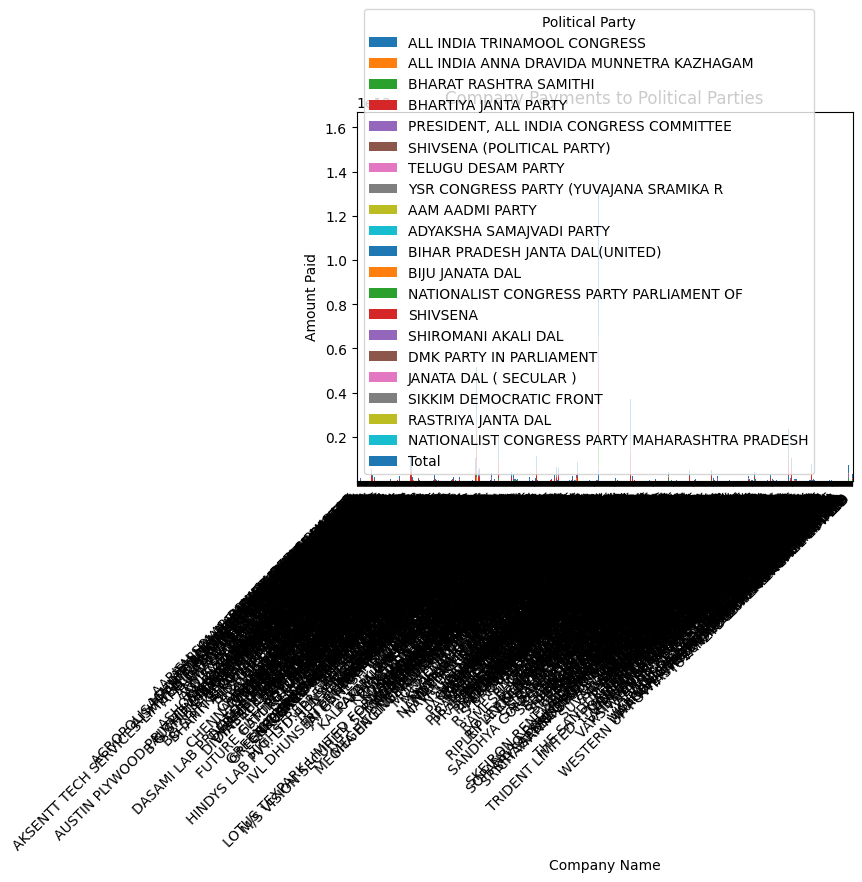


Company Payments to Political Parties:
Political Party                    ALL INDIA TRINAMOOL CONGRESS  \
Company Name                                                      
14 REELS PLUS LLP                                150,000,000.00   
A B C INDIA LIMITED                                        0.00   
AAKANKSHA BAHETY                                  69,000,000.00   
AARISH SOLAR POWER PRIVATE LIMITED                         0.00   
AASHMAN ENERGY PRIVATE LIMITED                             0.00   
...                                                         ...   
YOGESH MANPURIA                                            0.00   
YUVAN TRADING CONSULTANCY LLP                              0.00   
ZUVAN ENERGY PRIVATE LIMITED                               0.00   
ZUVAN ENERGY PVT LTD                             300,000,000.00   
ZYDUS HEALTHCARE LIMITED                                   0.00   

Political Party                    ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  \
Company N

In [40]:
plt.figure(figsize=(20, 15))
company_party_payments.plot(kind='bar', stacked=True)
plt.title('Company Payments to Political Parties')
plt.xlabel('Company Name')
plt.ylabel('Amount Paid')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Political Party')
plt.tight_layout()# Group by company name and political party to calculate total amount paid by each company to each party
company_party_payments = merged_data.groupby(['Company Name', 'Political Party'])['Denomination_x'].sum().unstack(fill_value=0)

# Convert large numbers to human-readable form
company_party_payments_human_readable = company_party_payments.applymap(lambda x: '{:,.2f}'.format(x))

# Calculate total amount of money paid by each company to each party
company_party_payments['Total'] = company_party_payments.sum(axis=1)

# Print table of company payments to political parties
print("\nCompany Payments to Political Parties:")
print(company_party_payments_human_readable)

# Print total amount of money paid by each company to each party
print("\nTotal Amount Paid by Each Company to Each Party:")
print(company_party_payments)
plt.show()

# Print table of company payments to political parties
print("\nCompany Payments to Political Parties:")
print(company_party_payments_human_readable)
